<a href="https://colab.research.google.com/github/d3sc/Colab_Notebooks/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# check dan import tensorflow, alias = tf
import tensorflow as tf

test 2.15.0


In [ ]:
# download dataset
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-06-11 12:59:53--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 172.64.145.29, 104.18.42.227, 2606:4700:4400::ac40:911d, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|172.64.145.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   212MB/s    in 0.3s    

2024-06-11 12:59:54 (212 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

/tmp/images/val


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
# latih model dengan model.fit
history = model.fit(
      train_generator,
      steps_per_epoch=40,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=30, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/30
40/40 - 2s - loss: 0.1946 - accuracy: 0.9250 - val_loss: 0.5181 - val_accuracy: 0.8000 - 2s/epoch - 52ms/step
Epoch 2/30
40/40 - 1s - loss: 0.1679 - accuracy: 0.9438 - val_loss: 0.4202 - val_accuracy: 0.9000 - 1s/epoch - 36ms/step
Epoch 3/30
40/40 - 1s - loss: 0.1616 - accuracy: 0.9500 - val_loss: 0.6069 - val_accuracy: 0.7500 - 1s/epoch - 36ms/step
Epoch 4/30
40/40 - 1s - loss: 0.1387 - accuracy: 0.9375 - val_loss: 0.4742 - val_accuracy: 0.8000 - 1s/epoch - 34ms/step
Epoch 5/30
40/40 - 2s - loss: 0.1182 - accuracy: 0.9500 - val_loss: 0.3309 - val_accuracy: 0.8500 - 2s/epoch - 45ms/step
Epoch 6/30
40/40 - 2s - loss: 0.3319 - accuracy: 0.8687 - val_loss: 0.4021 - val_accuracy: 0.8500 - 2s/epoch - 51ms/step
Epoch 7/30
40/40 - 1s - loss: 0.1089 - accuracy: 0.9625 - val_loss: 0.5358 - val_accuracy: 0.7500 - 1s/epoch - 35ms/step
Epoch 8/30
40/40 - 1s - loss: 0.1054 - accuracy: 0.9563 - val_loss: 0.5776 - val_accuracy: 0.8000 - 1s/epoch - 34ms/step
Epoch 9/30
40/40 - 1s - loss: 0.

check validation and train with chart

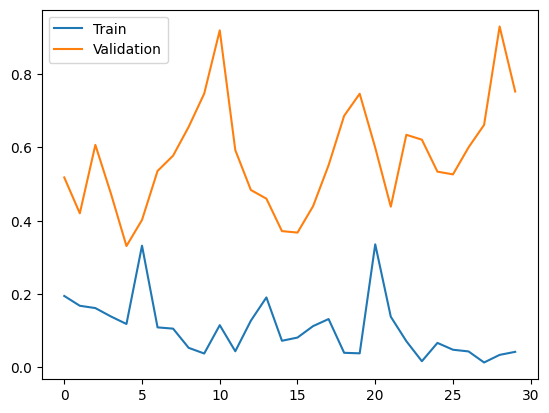

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.legend()

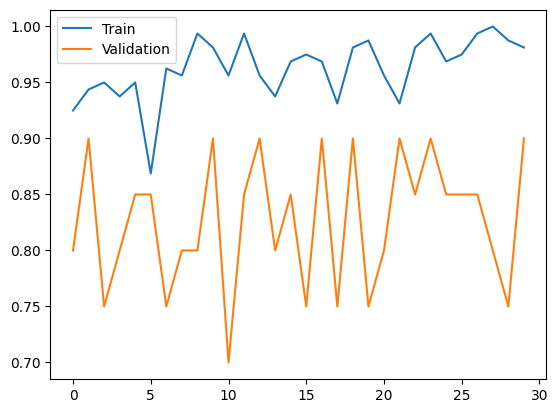

In [ ]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.legend()

Saving 25.png to 25.png
1/1 [==============================] - 0s 18ms/step
25.png
clean


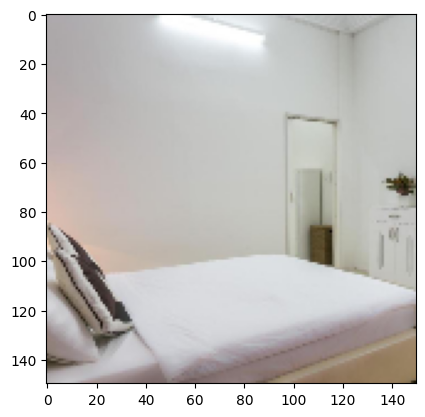

In [73]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=25)
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')